# More text-preprocessing prior to TfidfVectorizer

In [1]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# for gridsearch ... buiild many models with different parameters (e.g., with/without bi-gram)
from sklearn.grid_search import GridSearchCV

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Step 1: Loading the dataset

The data is in a single csv file. We can use Pandas, a python package, to load the data

In [134]:
df = pd.read_csv('data/spam.csv', header=None)
df.head()

,0,1
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [135]:
# remove numbers

df[0] = df[0].str.replace('\d+', '')
df.head()

,0,1
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in a wkly comp to win FA Cup final...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [136]:
# remove numbers and other non-words

df[0] = df[0].str.replace('[^a-zA-Z]+', ' ')
df.head()

,0,1
0,Go until jurong point crazy Available only in ...,0
1,Ok lar Joking wif u oni,0
2,Free entry in a wkly comp to win FA Cup final ...,1
3,U dun say so early hor U c already then say,0
4,Nah I don t think he goes to usf he lives arou...,0


In [137]:
# remove short words

df[0] = df[0].str.findall('\w{3,}').str.join(' ')
df.head()

,0,1
0,until jurong point crazy Available only bugis ...,0
1,lar Joking wif oni,0
2,Free entry wkly comp win Cup final tkts May Te...,1
3,dun say early hor already then say,0
4,Nah don think goes usf lives around here though,0


In [138]:
sms_data = df[0].values.tolist()
for i in sms_data[:2]:
    print i

until jurong point crazy Available only bugis great world buffet Cine there got amore wat
lar Joking wif oni


In [139]:
sms_label = df[1].values.tolist()
for i in sms_label[:2]:
    print i

0
0


In [140]:
print len(sms_data), len(sms_label)

5574 5574


# Step 2: Preprocessing & Step 3: Feature Engineering (Words to Vectors)

In [141]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(sms_data)
print tfidf.shape
print tfidf

(5574, 7553)
  (0, 6957)	0.243741991074
  (0, 3381)	0.345944902598
  (0, 4881)	0.270585538265
  (0, 1427)	0.267913647715
  (0, 449)	0.258759007117
  (0, 4509)	0.165343652377
  (0, 874)	0.292257808215
  (0, 2702)	0.191106374468
  (0, 7399)	0.234009324038
  (0, 872)	0.330242434104
  (0, 1158)	0.292257808215
  (0, 6578)	0.164799469385
  (0, 2664)	0.162019653862
  (0, 218)	0.345944902598
  (0, 7174)	0.193299057344
  (1, 3525)	0.424314889696
  (1, 3351)	0.544179286831
  (1, 7300)	0.448529675982
  (1, 4505)	0.568020165073
  (2, 2433)	0.149855598588
  (2, 2034)	0.462405475331
  (2, 7359)	0.248055440962
  (2, 1268)	0.253186541892
  (2, 7313)	0.191810303679
  (2, 1486)	0.259176523135
  :	:
  (5571, 4122)	0.422379935503
  (5571, 4820)	0.50789713146
  (5571, 6316)	0.50789713146
  (5572, 2433)	0.170500732882
  (5572, 7222)	0.200576117592
  (5572, 232)	0.120204432402
  (5572, 3630)	0.17085395051
  (5572, 5987)	0.196388199596
  (5572, 2384)	0.130070936666
  (5572, 6559)	0.10941427823
  (5572, 4321)	

In [142]:
tfidf_vectorizer.get_feature_names()[0:10]

[u'aah',
 u'aaniye',
 u'aaooooright',
 u'aathi',
 u'abbey',
 u'abdomen',
 u'abeg',
 u'abel',
 u'aberdeen',
 u'abi']

In [143]:
tfidf_vectorizer.get_feature_names()[-10:]

[u'zebra',
 u'zed',
 u'zeros',
 u'zhong',
 u'zindgi',
 u'zoe',
 u'zogtorius',
 u'zoom',
 u'zouk',
 u'zyada']

## Document Term Matrix (DTM)

In [144]:
tfidf_matrix = tfidf_vectorizer.fit_transform(sms_data).toarray()
tfidf_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [145]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=sms_data,columns=tfidf_vectorizer.get_feature_names()).head()

,aah,aaniye,aaooooright,aathi,abbey,abdomen,abeg,abel,aberdeen,abi,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
until jurong point crazy Available only bugis great world buffet Cine there got amore wat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lar Joking wif oni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply over,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dun say early hor already then say,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nah don think goes usf lives around here though,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 4 Model Building / Model Validation / Model Evaluation

## Naive Bayes

Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [146]:
# the below model does not use "split validation", meaning this model is NOT validated. 
# We create this invalidated model to illustrate the concep called "overfitting"
# overfitting happends that the model fits extremely well into the existing dataset, but would not be suitable for new datasets
# Simply, the model is not much generalizable.

nb = MultinomialNB().fit(tfidf, sms_labels)

predicted = nb.predict(tfidf)
np.mean(predicted == sms_labels)  

0.97380696088984575

In [147]:
print '\n overall accuracy:'
print metrics.accuracy_score(sms_labels, predicted)

print '\n confusion_matrix:'
print metrics.confusion_matrix(sms_labels, predicted)

print '\n Here is the classification report:'
print metrics.classification_report(sms_labels, predicted)


 overall accuracy:
0.97380696089

 confusion_matrix:
[[4826    1]
 [ 145  602]]

 Here is the classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4827
          1       1.00      0.81      0.89       747

avg / total       0.97      0.97      0.97      5574



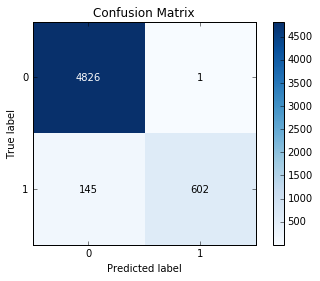

In [148]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# !pip install scikit-plot
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=sms_labels, y_pred=predicted)
plt.show()

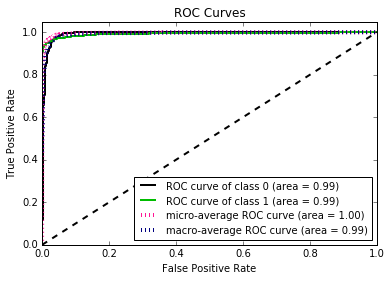

In [149]:
# true positive rate = 614 / 747 = 82%
# false positive rate = 0 / 4827 = 0%

probas = nb.predict_proba(tfidf)
skplt.plot_roc_curve(y_true=sms_labels, y_probas=probas)
plt.show()

The above ROC curve shows our Naive Bayesian classification model is almost perfect. 
<br><br>
The diagonal line represents pure guessing.

## Split validation

In Step 4, we built a model using different machine learning (or classification) algorithms. However, it is a **bad idea to evaluate the performance of the model on the same dataset we train the model on**. Thus, we'll use a validation method called ** split validation**.

First, we split the dataset to two parts: **training dataset (70% of the original dataset)** and **testing dataset (30% of the original dataset)**. We build a model using training dataset and apply the model to testing dataset and measure the accuracy of the model. You could have a 80-20 split or a 50-50 split.

We will build a predictive model using **x_train** and **y_train**, which are called as **training dataset**.

Then, we will apply the model to **x_test** and **y_test** (**testing dataset**) and this will tell us the performance or quality of the model

In [150]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.developer.com/imagesvr_ce/6793/ML4.png")

In [151]:
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(3901, 3901, 1673, 1673)

In [152]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print X_train[:2]
print "+++++++++++++++++++++++++++++++++++++++++"
print X_test[:2]

  (0, 1204)	0.638808364203
  (0, 1637)	0.638808364203
  (0, 2503)	0.293580980942
  (0, 266)	0.264349602294
  (0, 6261)	0.166665062463
  (1, 5038)	0.435019215097
  (1, 1485)	0.436888669869
  (1, 2898)	0.634129501709
  (1, 6068)	0.466654419993
+++++++++++++++++++++++++++++++++++++++++
  (0, 6261)	0.145761899082
  (0, 6055)	0.258685604128
  (0, 5464)	0.220213600611
  (0, 3606)	0.316768663611
  (0, 2993)	0.48711992507
  (0, 2895)	0.268133291783
  (0, 2408)	0.309984458102
  (0, 1122)	0.382273272771
  (0, 288)	0.37806891805
  (0, 141)	0.262027100038
  (1, 5038)	0.479865519857
  (1, 3299)	0.623825948143
  (1, 2949)	0.510553040818
  (1, 759)	0.34627425805


In [153]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.95636580992229525

In [154]:
print '\n overall accuracy:'
print metrics.accuracy_score(y_test, predicted)

print '\n confusion_matrix:'
print metrics.confusion_matrix(y_test, predicted)

print '\n Here is the classification report:'
print metrics.classification_report(y_test, predicted)


 overall accuracy:
0.956365809922

 confusion_matrix:
[[1431    0]
 [  73  169]]

 Here is the classification report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      1431
          1       1.00      0.70      0.82       242

avg / total       0.96      0.96      0.95      1673



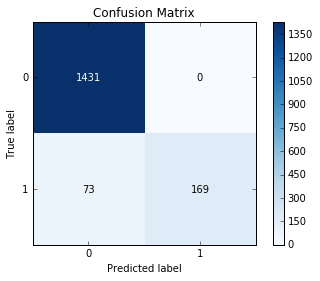

In [155]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# !pip install scikit-plot
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

# Step 5: Model Deployment

In [156]:
docs_new = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question",
            "Even my brother is not like to speak with me. They treat me like aids patent.",
             "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9",
            "hello, thank you",
           "To claim txt DIS to 87121"]

unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)

predicted = nb.predict(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question' => 1
'Even my brother is not like to speak with me. They treat me like aids patent.' => 0
"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9" => 0
'hello, thank you' => 0
'To claim txt DIS to 87121' => 1


In [157]:
#let's find the probability

predicted_prob = nb.predict_proba(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted_prob):
    print('%r => %s' % (doc, category))

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question' => [ 0.06805643  0.93194357]
'Even my brother is not like to speak with me. They treat me like aids patent.' => [ 0.98133642  0.01866358]
"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9" => [ 0.87510252  0.12489748]
'hello, thank you' => [ 0.98066628  0.01933372]
'To claim txt DIS to 87121' => [ 0.32744995  0.67255005]


# Appendixes
- We need to understand the following topics as well.

## Appendix. Building a pipeline

As you have seen, building a classification (or predictive) model requires several steps. **Pipeline** is what chains these different steps together, and thus streamline the predictive modeling process. Using pipeline we write less codes.

Also, Pipeline can build several predictive models through a loop to find the best one.

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
http://scikit-learn.org/stable/modules/pipeline.html

In [158]:
# combining feature engineering and model building
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])

In [159]:
nb_pipeline = nb_pipeline.fit(x_train, y_train)
nb_pipeline

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [160]:
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.95636580992229525

In [161]:
# a complete pipeline

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.95636580992229525

## Appendix. Other Classifiers: How to find a better model with different classifiers or classification algorithms?

<img src="http://scikit-learn.org/stable/_static/ml_map.png">

### kNeighbors Classifier (kNN)
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- http://scikit-learn.org/stable/modules/neighbors.html

In [162]:
knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.90436341900777051

### Support Vector Machine (SVM)
- http://scikit-learn.org/stable/modules/svm.html

In [163]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.98027495517035268

This shows that SVM works best for this dataset. You can use this svm model for model deployment

In [164]:
# to figure out processing time

import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
print np.mean(predicted == y_test)

elapsed = timeit.default_timer() - start_time
print "%s %s" % ("this processing has taken", elapsed)

0.98027495517
this processing has taken 2.33155746772


In my computer the above processing took about 2.63 seconds. How about yours?

In [165]:
docs_new = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question",
            "Even my brother is not like to speak with me. They treat me like aids patent.",
             "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9",
            "hello, thank you",
           "To claim txt DIS to 87121"]

#unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)
predicted = svm_pipeline.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question' => 1
'Even my brother is not like to speak with me. They treat me like aids patent.' => 0
"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9" => 0
'hello, thank you' => 0
'To claim txt DIS to 87121' => 1


In [166]:
#let's find the probability

predicted_prob = svm_pipeline.predict_proba(docs_new)

for doc, category in zip(docs_new, predicted_prob):
    print('%s => %s' % (doc, (category)))

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question => [ 0.0484292  0.9515708]
Even my brother is not like to speak with me. They treat me like aids patent. => [ 0.99216601  0.00783399]
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 => [ 0.96969412  0.03030588]
hello, thank you => [ 0.99151021  0.00848979]
To claim txt DIS to 87121 => [  3.22039147e-09   9.99999997e-01]


## Appendix. Changing Parameters: How to improve this model? How to find a better model? How to deploy the predictive model in practice?

### Improving the Naive Bayes-based predictive model by changing parameter values?

See the parameters in Naive Bayes classifier

- TfidfVectorizer(input=’content’, encoding=’utf-8’, decode_error=’strict’, strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer=’word’, stop_words=None, token_pattern=’(?u)\b\w\w+\b’, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64’>, norm=’l2’, use_idf=True, smooth_idf=True, sublinear_tf=False)

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- max_df : float in range [0.0, 1.0] or int, default=1.0 
When building the vocabulary ignore terms that have a **document frequency** strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. 
    - For example, max_df = 0.7 ==> This removes words which appear in more than 70% of the corpus (**removing frequent words**).
<br><br>    
- min_df : float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. 
    - For example, min_df = 5 ==> This removes words which appear in less than five documents (**removing rare words**).

### Using different parameter values (e.g., removing stopwords, using stemming words, using ngrams, removing too frequent words, removing too rare words), the model accuracy can be improved.

In [167]:
# removing stopwords

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.96712492528392113

In [168]:
# removing stopwords & rare words

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', min_df=2)), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.97310221159593546

In [169]:
# removing stopwords

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.90376569037656906

In [170]:
# removing stopwords

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.97609085475194257

In [171]:
# removing stopwords & using bigram as well

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.89061566049013752

In [172]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9778840406455469

It looks like the best model uses **TFIDF (and bigram) with SVM after removing stopwords**

### Pipeline with multiple classifiers (or algorithms)
- Then, can we test the accuracy of all classifiers at once?

In [173]:
classifiers = [MultinomialNB(), KNeighborsClassifier(), SVC(kernel='linear', probability=True)]

In [174]:
for clf in classifiers:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), 
                         ('clf', clf)])
    classifiers_pipeline = pipeline.fit(x_train, y_train)
    predicted = classifiers_pipeline.predict(x_test)
    print "%s --> %s" % (clf, np.mean(predicted == y_test))
    print " ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ "

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) --> 0.947997609085
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') --> 0.89061566049
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) --> 0.977884040646
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 


## Appendix. k-fold Cross validation (CV) 

### 10-fold CV
* The basic idea is that, rather than testing the model quality **only once**, cross validation (or 10-fold CV) tests the model **10 times** with 10 different testing datasets.

#### How?
* The training (or original) dataset is randomly partitioned into 10 equal sized subsamples (see the figure below). 
* At each time, one subsample is set aside as the **testing** or **validation dataset** and the other 9 subsamples are used as the training dataset. 
* A model is built using the training dataset and tested with the testing dataset. This is done 10 times. 
* This leads to 10 evaluation scores (mean squared error). The final score is based on the average of the scores.

<img src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png">


In [175]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(nb_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.97849462  0.97491039  0.95519713  0.97311828  0.96057348  0.95878136
  0.96415771  0.97302158  0.97122302  0.96942446]
0.967890203966


In [176]:
knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(knn_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.91577061  0.91935484  0.91935484  0.90681004  0.91756272  0.92114695
  0.91039427  0.92446043  0.91546763  0.92805755]
0.917837987674


In [177]:
import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(svm_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print scores
print scores.mean()

elapsed = timeit.default_timer() - start_time
print "%s %s" % ("this processing has taken", elapsed)

[ 0.98566308  0.97849462  0.98387097  0.9874552   0.98207885  0.97491039
  0.98207885  0.98201439  0.98381295  0.98381295]
0.98241922591
this processing has taken 61.1147039392


This process has taken 72 seconds in my machine. 

## Appendix. Parameter tuning using Grid Search (Requiring high computational power!!!) 
## Warning: This process is likely to slow down your computer

" We’ve already encountered some parameters such as stopwords and ngram in the TfidfTransformer. Classifiers tend to have many parameters as well; e.g., MultinomialNB includes a smoothing parameter alpha and SGDClassifier has a penalty parameter alpha and configurable loss and penalty terms in the objective function (see the module documentation, or use the Python help function, to get a description of these).

Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values. We try out all classifiers on either words or bigrams, with or without idf, and with a penalty parameter of either 0.01 or 0.001 for the linear SVM:"

http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [178]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])

In [179]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__min_df': [1, 2, 5],
              'tfidf__max_df': [0.9, 0.8, 0.7],
              'clf__alpha': (0.01, 0.001, 1),
}

**TfidfVectorizer** 

- ngram_range : tuple (min_n, max_n)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

- min_df : float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

**MultinomialNB()** MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

- alpha : float, optional (default=1.0)
    - Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [180]:
gs_clf = GridSearchCV(nb_pipeline, parameters)
gs_clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'tfidf__max_df': [0.9, 0.8, 0.7], 'clf__alpha': (0.01, 0.001, 1), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'tfidf__min_df': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [181]:
gs_clf.best_score_

0.9797487823634965

In [182]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__max_df: 0.9
tfidf__min_df: 1
tfidf__ngram_range: (1, 3)


Now, we can use the best model recommended by gridsearch.

In [183]:
# split validation

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test) 

0.9778840406455469

In [184]:
# 10 fold cross validation

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(nb_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.9874552   0.98028674  0.98207885  0.9874552   0.98028674  0.98028674
  0.98566308  0.98561151  0.97661871  0.98021583]
0.982595858797


## Appendix get most informative features for scikit-learn classifier (Naive Bayes) for different class?

In [185]:
# since we know the parameters for the best NB model, let's initialize TfidfVectorizer again

tfidf_vectorizer = TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, ngram_range=(1,2), max_df=0.9)

In [186]:
# split validation again

x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(4459, 4459, 1115, 1115)

In [187]:
# transform traing data and testing data to tfidf format 

X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

In [188]:
# now we have more vectors due to bi-grams
print X_train.shape
print X_test.shape

(4459, 27536)
(1115, 27536)


In [189]:
print tfidf_vectorizer.get_feature_names()[0:5]
print tfidf_vectorizer.get_feature_names()[-5:]

[u'aah', u'aah bless', u'aah cuddle', u'aah speak', u'aaniye']
[u'zoe just', u'zouk', u'zouk nichols', u'zyada', u'zyada kisi']


In [190]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.95156950672645735

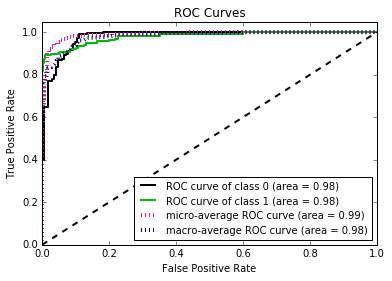

In [191]:
probas = nb.predict_proba(X_test)
skplt.plot_roc_curve(y_true=y_test, y_probas=probas)
plt.show()

In [192]:
#https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print "========================================="

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

('0', -10.316694638423741, u'aah')
('0', -10.316694638423741, u'aah bless')
('0', -10.316694638423741, u'aah cuddle')
('0', -10.316694638423741, u'aah speak')
('0', -10.316694638423741, u'aaniye')
('0', -10.316694638423741, u'aaniye pudunga')
('0', -10.316694638423741, u'aaooooright')
('0', -10.316694638423741, u'aaooooright work')
('0', -10.316694638423741, u'aathi')
('0', -10.316694638423741, u'aathi dear')
('1', -7.2841863318469073, u'free')
('1', -7.4970954030224313, u'txt')
('1', -7.6267246325768472, u'mobile')
('1', -7.698155179534302, u'claim')
('1', -7.7385296143462705, u'stop')
('1', -7.7400629609442513, u'prize')
('1', -7.7624584375996708, u'text')
('1', -7.9119405667253595, u'reply')
('1', -7.9126575888542385, u'won')
('1', -7.9163693229043126, u'www')


It appears **spam** mails tend to contain such terms as **free, claim, prize, reply, ... **

# References

- http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html (Naive Bayes)
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (KNN)
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html (SVM)
- https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c